<a href="https://colab.research.google.com/github/tonykks/2024_mirae_master/blob/main/2%EC%9D%BC%EC%B0%A8_%ED%83%90%EC%83%89%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B8%B0%EC%83%81%EC%B2%AD%EB%82%A0%EC%94%A8_%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 탐색적데이터분석

## 4. 공공 데이터 분석-기상청날씨

---

**[주의!] (코랩)한글 폰트 지정하는 방법**

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (17.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123622 files and direc

## 기상청 데이터 분석(종관데이터)

### #파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기 <br>
 [사전준비] 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 1. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 2. 데이터 전처리하기 : 필요한 데이터만 추출하기
 3. 데이터 시각화하기 : 데이터 그래프로 나타내기
 4. 데이터 저장하기 :  파일로 저장하기

---

### 1.데이터 다운로드하기

- 기상청 사이트에서 날씨 데이터를 다운로드한다.
- 사이트에 가입하고 로그인해야 다운로드할 수 있다.
- https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
- csv파일 다운로드해서 사용
- OBS_ASOS_MNH_~.csv 파일 이름을 'weather_data.csv'로 변경해서 사용하기


- 파일 업로드하기

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

---------

### 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기

In [1]:
import pandas as pd

# file = 'weather_data.csv'
file = 'OBS_ASOS_MNH_20241013000738.csv'
df = pd.read_csv(file, encoding='cp949')

print(type(df))
df.head(2)

<class 'pandas.core.frame.DataFrame'>


,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57705 entries, 0 to 57704
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  57705 non-null  int64  
 1   지점명                 57705 non-null  object 
 2   일시                  57705 non-null  object 
 3   평균기온(°C)            56977 non-null  float64
 4   최고기온(°C)            57507 non-null  float64
 5   최저기온(°C)            57482 non-null  float64
 6   평균현지기압(hPa)         55167 non-null  float64
 7   평균상대습도(%)           56410 non-null  float64
 8   월합강수량(00~24h만)(mm)  57412 non-null  float64
 9   평균풍속(m/s)           56446 non-null  float64
 10  합계 일조시간(hr)         56324 non-null  float64
 11  최심적설(cm)            12043 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.3+ MB


---

### 2.데이터 전처리(가공하기)
- 함수 참고:  https://pandas.pydata.org/docs/reference/index.html

#### # 데이터 요약

In [3]:
# 데이터 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57705 entries, 0 to 57704
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  57705 non-null  int64  
 1   지점명                 57705 non-null  object 
 2   일시                  57705 non-null  object 
 3   평균기온(°C)            56977 non-null  float64
 4   최고기온(°C)            57507 non-null  float64
 5   최저기온(°C)            57482 non-null  float64
 6   평균현지기압(hPa)         55167 non-null  float64
 7   평균상대습도(%)           56410 non-null  float64
 8   월합강수량(00~24h만)(mm)  57412 non-null  float64
 9   평균풍속(m/s)           56446 non-null  float64
 10  합계 일조시간(hr)         56324 non-null  float64
 11  최심적설(cm)            12043 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.3+ MB


#### # 기술통계 정보

In [4]:
df.describe()

,지점,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
count,57705.000000,56977.000000,57507.000000,57482.000000,55167.000000,56410.000000,57412.000000,56446.000000,56324.000000,12043.000000
mean,187.307894,12.723248,24.423448,2.126320,1005.720008,69.910690,110.973885,2.306932,188.505836,8.174907
std,62.273109,9.180770,8.023021,10.798834,16.156652,9.892724,121.507636,1.282888,46.525205,14.814384
min,90.000000,-13.500000,-4.800000,-32.600000,911.800000,8.000000,0.000000,-0.400000,0.000000,0.000000
25%,135.000000,4.700000,18.000000,-6.500000,1001.050000,63.000000,30.700000,1.400000,158.600000,1.500000
50%,175.000000,13.300000,25.900000,1.400000,1008.500000,71.000000,68.800000,2.000000,189.100000,4.300000
75%,245.000000,21.000000,31.200000,11.600000,1015.800000,77.000000,146.900000,2.900000,219.200000,9.000000
max,296.000000,30.200000,41.000000,25.200000,1029.700000,99.000000,1364.200000,22.700000,1300.300000,293.600000


#### # 결측데이터 시각화
missingno패키지는 pandas 데이터프레임 데이터에서 누락된 데이터를 찾고 시각화하는 기능 제공

In [5]:
!pip install missingno

- **행에 결측 데이터 시각화**

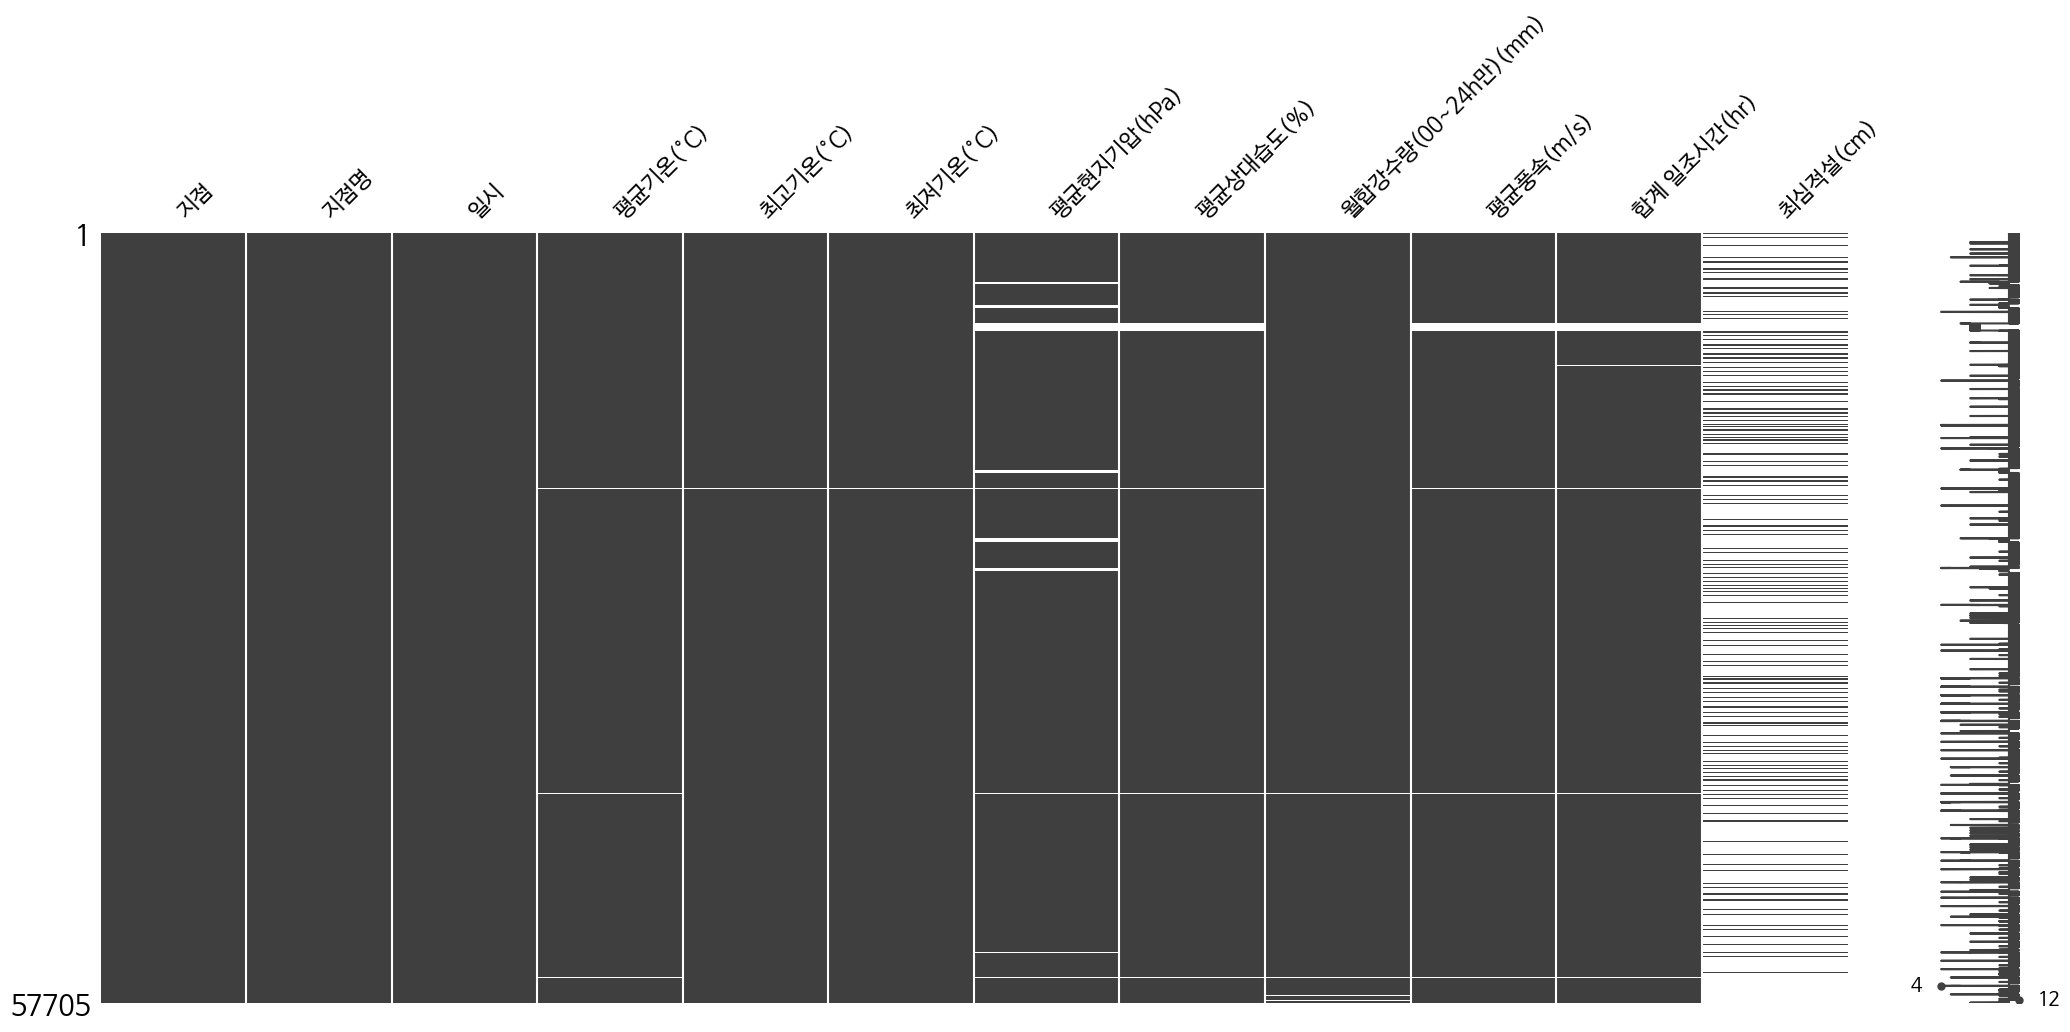

In [7]:
import missingno as msno
import matplotlib.pyplot as plt

# 코랩에서 한글 폰트 설치한 후 사용하기!!!
# plt.rc('font', family='cmb10')                  # (코랩)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트

msno.matrix(df)
plt.show()

- **열에 결측 데이터 시각화**

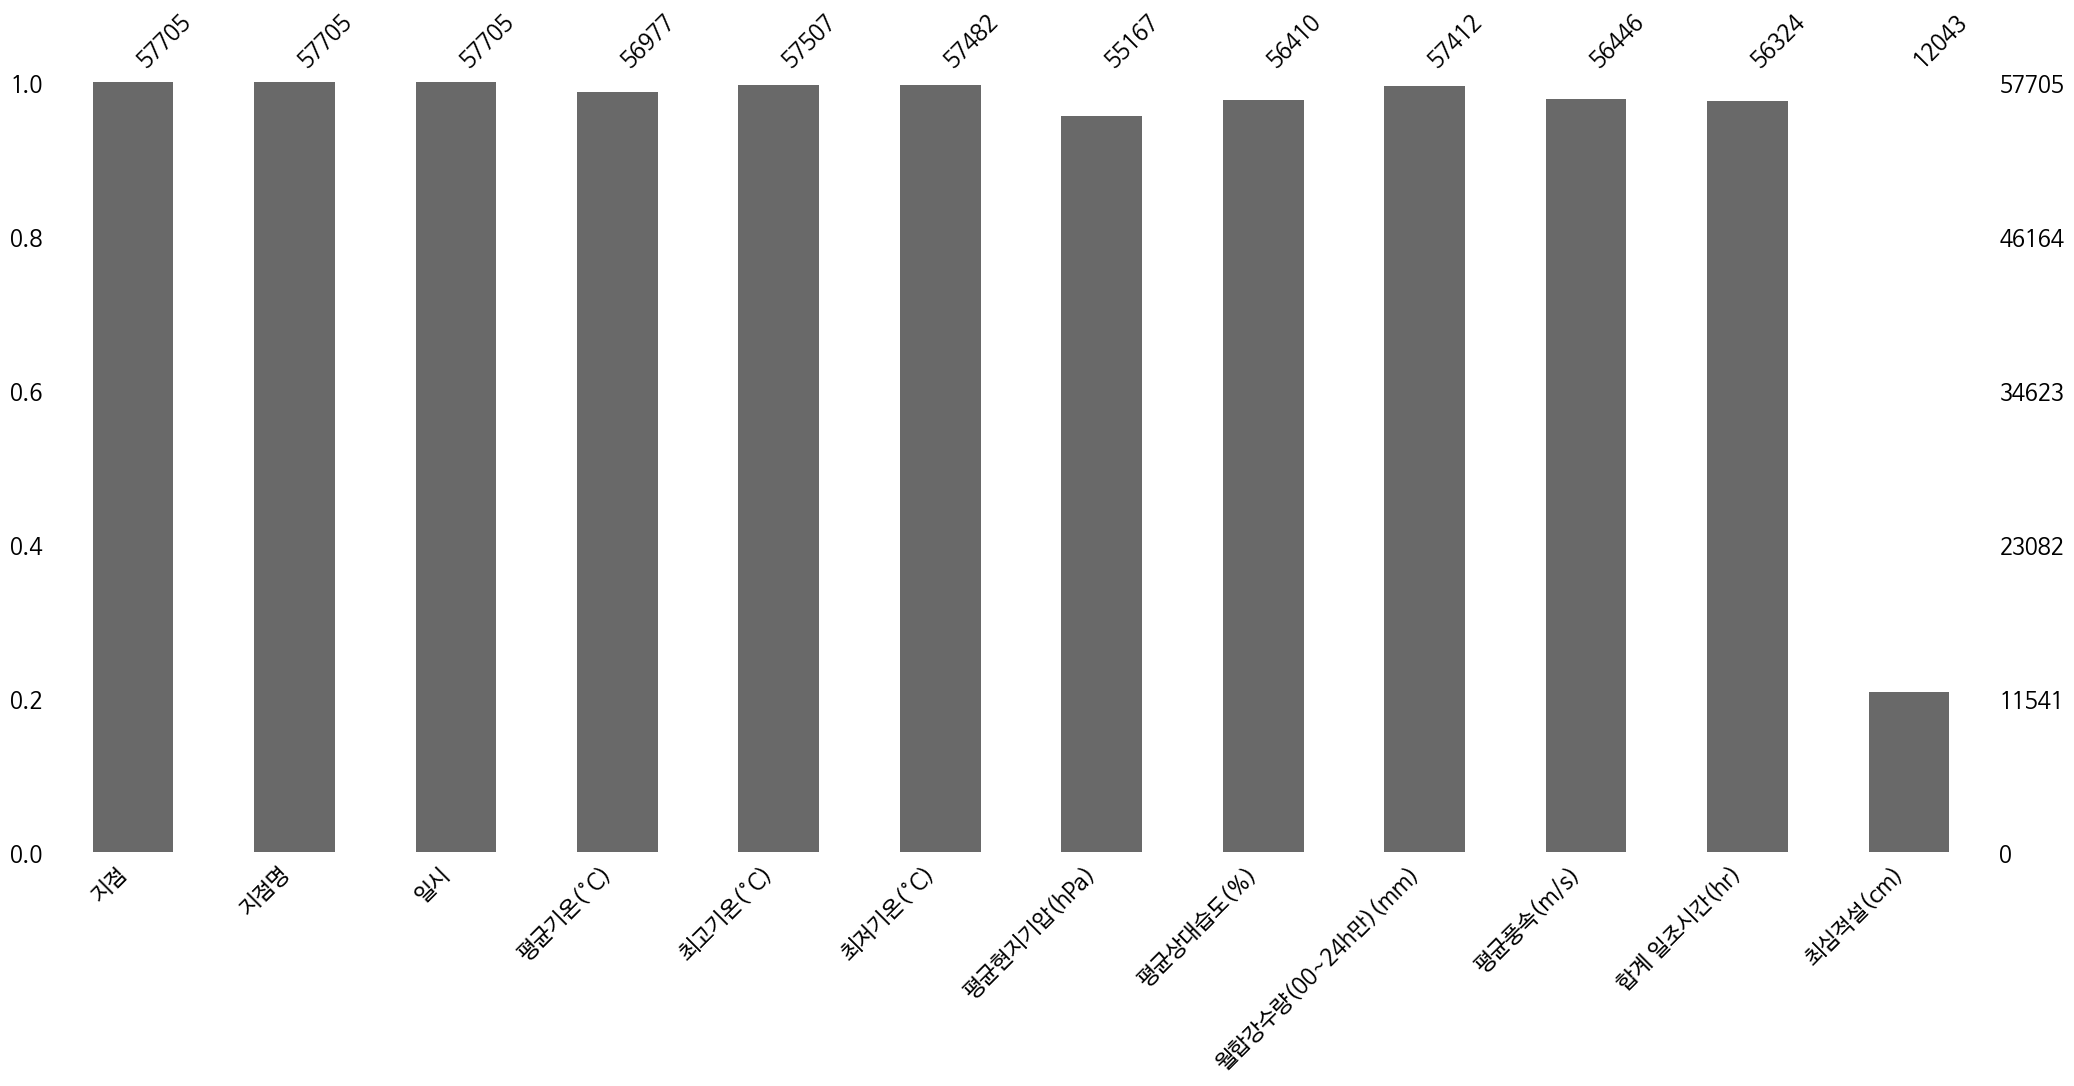

In [8]:
msno.bar(df)
plt.show()

---

#### 2. 컬럼명 변경하기

In [9]:
df.columns
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온', '평균현지기압',
       '평균상대습도', '월합강수량', '평균풍속','일조시간', '최심적설']
df.head(3)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0


In [10]:
# 특정 컬럼명 변경
df = df.rename(columns={'평균기온(°C)':'평균기온', '최고기온(°C)':'최고기온'})

### @결측치 확인

In [11]:
df[ df.isnull() ]

# 결측치가 포함된 컬럼의 모든 행 가져오기
df[df.isnull().any(axis=1)]  # axis=1 (컬럼 기준)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
3,90,속초,1968-04,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
5,90,속초,1968-06,18.5,29.2,11.4,1009.1,82.0,48.3,1.9,182.2,NaN
6,90,속초,1968-07,22.8,35.8,17.1,1005.7,87.0,304.7,1.6,117.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
57700,296,북부산,2024-06,23.2,33.6,13.0,1008.5,74.0,177.0,1.9,183.3,NaN
57701,296,북부산,2024-07,27.1,37.0,21.2,1008.4,87.0,217.0,2.5,144.7,NaN
57702,296,북부산,2024-08,29.3,36.8,22.6,1007.4,80.0,73.5,2.3,239.6,NaN
57703,296,북부산,2024-09,26.5,36.2,17.0,1013.2,77.0,418.5,2.4,169.8,NaN


In [12]:
# 평균기온이 null인 행들 가져오기
df[ df['평균기온'].isnull() ]

# '평균기온'이 null이고 '일시'가 '2024-10'가 아닌 행들 가져오기
df_data = df[ (df['평균기온'].isnull()) & (df['일시'] != '2024-10') ]
df_data.head(2)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
1817,100,대관령,1971-07,NaN,25.6,19.6,NaN,NaN,NaN,NaN,NaN,NaN
1818,100,대관령,1971-08,NaN,29.6,6.7,NaN,NaN,200.8,2.3,NaN,NaN


#### 3. 컬럼 추가하기
DataFrame.insert(추가하고싶은위치,컬럼명,값, allow_duplicate=False)

In [13]:
df.insert(3,'신규',df['지점'])
df.head(2)

,지점,지점명,일시,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


In [14]:
df.insert(3,'검색일자',df['일시'])

In [15]:
df.head(3)

,지점,지점명,일시,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968-02,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968-03,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0


- **문자열에서 특정 문자 제거**: '검색일자' 값중에 '년도-월-일' 형태로 되어 있는 구조에서  '-'기호를 제거

In [16]:
df['검색일자']= df['검색일자'].str.replace(pat=r'-',repl=r'',regex=True)
df.head(2)

,지점,지점명,일시,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,196801,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,196802,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


- **데이터형 변환하기**: str(object)-->int64 형으로 변환하기

In [17]:
df['검색일자'].dtypes   # 컬럼의 데이터형 조회

dtype('O')

In [18]:
df['검색일자'] = df['검색일자'].apply('int64')  # 정수형으로 변경하기
df.dtypes

,0
지점,int64
지점명,object
일시,object
검색일자,int64
신규,int64
평균기온,float64
최고기온,float64
최저기온,float64
평균현지기압,float64
평균상대습도,float64


- **데이터형 변환하기**: int64 --> str(object)형으로 변환하기

In [19]:
df['검색일자'] = df['검색일자'].apply(str)
df.dtypes

,0
지점,int64
지점명,object
일시,object
검색일자,object
신규,int64
평균기온,float64
최고기온,float64
최저기온,float64
평균현지기압,float64
평균상대습도,float64


In [20]:
# 년월 컬럼 추가
df.insert(3,'년도',df['일시'].str[0:4])
df.head(2)

,지점,지점명,일시,년도,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,196801,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,196802,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


In [21]:
# 월 컬럼 추가
df.insert(4,'월',df['일시'].str[5:7])
df.head(2)

,지점,지점명,일시,년도,월,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,01,196801,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,02,196802,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


#### 4. 컬럼 삭제

In [22]:
# 컬럼 삭제 (drop(컬럼이름, axis=1, inplace=True)
df.drop('신규', axis=1, inplace=True)
df.drop('검색일자', axis=1, inplace=True)
df.head(3)

,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968,03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0


#### 5. 특정 조건 검색

In [23]:
print( '#지점명 개수: ', len( set(df['지점명']) ) )  # 고유한(unique)값만 뽑기 위해 set() 자료형에 대입
print( '#지점명: ', set( df['지점명'] ) )

#지점명 개수:  104
#지점명:  {'세종', '서산', '주암', '제주', '보성군', '보은', '장수', '포항', '청송군', '서귀포', '거제', '북춘천', '순천', '경주시', '속초', '창원', '북부산', '강화', '대구(기)', '임실', '무안', '정읍', '밀양', '삼척', '영천', '북강릉', '백령도', '파주', '순창군', '안동', '태백', '김해시', '제천', '원주', '대구', '서청주', '흑산도', '산청', '영덕', '통영', '전주', '고흥', '부산', '진도군', '합천', '보령', '함양군', '양평', '홍천', '진도(첨찰산)', '청주', '영월', '여수', '부안', '정선군', '고창군', '의령군', '대관령', '북창원', '추풍령', '목포', '관악산', '수원', '영광군', '동두천', '인천', '광주', '성산', '금산', '영주', '상주', '홍성', '군산', '문경', '철원', '강릉', '이천', '강진군', '천안', '장흥', '성산포', '고창', '거창', '부여', '해남', '남해', '진주', '울산', '동해', '서울', '고산', '춘천', '울릉도', '울진', '완도', '남원', '의성', '인제', '봉화', '대전', '구미', '광양시', '양산시', '충주'}


In [24]:
# 2024년도의 데이타만 추출
df_2024 = df.query(" 년도 == '2024' ")
df_2024 = df[ df['년도'] == '2024' ]
df_2024

,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
672,90,속초,2024-01,2024,01,0.6,11.1,-12.3,1021.2,53.0,11.6,2.0,203.4,NaN
673,90,속초,2024-02,2024,02,1.9,18.1,-5.6,1023.1,75.0,125.7,1.7,109.7,NaN
674,90,속초,2024-03,2024,03,5.7,20.6,-7.4,1015.2,58.0,58.6,2.2,212.9,NaN
675,90,속초,2024-04,2024,04,13.9,27.1,2.1,1012.1,66.0,63.4,2.2,195.2,NaN
676,90,속초,2024-05,2024,05,17.8,33.2,6.5,1009.7,61.0,63.4,2.6,253.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57700,296,북부산,2024-06,2024,06,23.2,33.6,13.0,1008.5,74.0,177.0,1.9,183.3,NaN
57701,296,북부산,2024-07,2024,07,27.1,37.0,21.2,1008.4,87.0,217.0,2.5,144.7,NaN
57702,296,북부산,2024-08,2024,08,29.3,36.8,22.6,1007.4,80.0,73.5,2.3,239.6,NaN
57703,296,북부산,2024-09,2024,09,26.5,36.2,17.0,1013.2,77.0,418.5,2.4,169.8,NaN


In [25]:
# 2024년도의 지점명 개수와 목록
print( '#지점명 개수: ', len( set(df_2024['지점명']) ) )
print( '#지점명: ', set( df_2024['지점명'] ) )

#지점명 개수:  97
#지점명:  {'세종', '서산', '제주', '보성군', '보은', '장수', '포항', '청송군', '서귀포', '거제', '북춘천', '순천', '경주시', '속초', '창원', '북부산', '강화', '임실', '정읍', '밀양', '영천', '북강릉', '백령도', '파주', '순창군', '안동', '태백', '김해시', '제천', '원주', '대구', '서청주', '흑산도', '산청', '영덕', '통영', '전주', '고흥', '부산', '진도군', '합천', '보령', '함양군', '양평', '홍천', '청주', '영월', '여수', '부안', '정선군', '고창군', '의령군', '대관령', '북창원', '추풍령', '목포', '수원', '영광군', '동두천', '인천', '광주', '성산', '금산', '영주', '상주', '홍성', '군산', '문경', '철원', '강릉', '이천', '강진군', '천안', '장흥', '고창', '거창', '부여', '해남', '남해', '진주', '울산', '동해', '서울', '고산', '춘천', '울릉도', '울진', '완도', '남원', '의성', '인제', '봉화', '대전', '구미', '광양시', '양산시', '충주'}


### [퀴즈] 1904년도(최초 측정) 지점명 개수와 목록

In [26]:
# 1904년도 최초 측정일 때 지점명 개수와 목록
df_1904 = df[ df['년도'] == '1904' ]
print( '#지점명 개수: ', len( set(df_1904['지점명']) ) )
print( '#지점명: ', set( df_1904['지점명'] ) )

#지점명 개수:  3
#지점명:  {'목포', '부산', '인천'}


In [27]:
df_1904

,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
6777,112,인천,1904-04,1904,04,NaN,19.2,6.4,NaN,NaN,104.9,NaN,NaN,NaN
6778,112,인천,1904-05,1904,05,14.3,23.8,8.8,NaN,NaN,50.5,NaN,NaN,NaN
6779,112,인천,1904-06,1904,06,19.7,30.3,12.6,NaN,NaN,34.6,NaN,NaN,NaN
6780,112,인천,1904-07,1904,07,23.5,32.8,17.0,NaN,NaN,293.7,NaN,NaN,NaN
6781,112,인천,1904-08,1904,08,25.5,33.3,17.5,NaN,NaN,117.4,NaN,NaN,NaN
6782,112,인천,1904-09,1904,09,20.9,30.1,11.1,NaN,NaN,17.1,NaN,NaN,NaN
6783,112,인천,1904-10,1904,10,13.7,27.5,1.3,NaN,NaN,25.6,NaN,NaN,NaN
6784,112,인천,1904-11,1904,11,5.9,16.6,-4.1,NaN,NaN,16.9,NaN,NaN,NaN
6785,112,인천,1904-12,1904,12,0.4,13.3,-9.6,NaN,NaN,11.5,NaN,NaN,NaN
22879,159,부산,1904-04,1904,04,NaN,21.4,4.7,NaN,NaN,172.9,NaN,NaN,NaN


- **특정 컬럼명 검색** : 지점명=='제주' 데이터

In [28]:
# df[df.지점명 == '제주' ]

df.query(" 지점명 == '제주' ")

# df.iloc[ df.index[ df['지점명'] == '제주' ] ]

,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
29200,184,제주,1923-05,1923,05,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
29201,184,제주,1923-06,1923,06,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN
29202,184,제주,1923-07,1923,07,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN
29203,184,제주,1923-08,1923,08,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN
29204,184,제주,1923-09,1923,09,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30413,184,제주,2024-06,2024,06,23.1,31.4,16.8,1005.9,73.0,271.8,2.8,155.0,NaN
30414,184,제주,2024-07,2024,07,28.9,35.5,22.6,1004.9,73.0,156.0,3.5,204.9,NaN
30415,184,제주,2024-08,2024,08,29.9,35.0,25.2,1004.2,72.0,47.0,2.9,275.2,NaN
30416,184,제주,2024-09,2024,09,27.6,35.1,21.1,1009.1,73.0,126.2,2.9,131.5,NaN


- **또는(|) , 포함(in)** 조건 사용: 제주 또는 서귀포 데이터 추출

In [29]:
# 또는(|) 사용
df.query(" 지점명=='제주' | 지점명=='서귀포' ")
df.head()

df.query(" 지점명=='제주' | 지점명=='서귀포' ").head()
df_jeju = df.query(" 지점명 in ('제주','서귀포','성산','성산포','고산') ")
df_jeju

,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
29200,184,제주,1923-05,1923,05,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
29201,184,제주,1923-06,1923,06,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN
29202,184,제주,1923-07,1923,07,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN
29203,184,제주,1923-08,1923,08,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN
29204,184,제주,1923-09,1923,09,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49070,265,성산포,2006-11,2006,11,14.3,24.1,4.9,1016.6,68.0,85.5,3.8,141.5,NaN
49071,265,성산포,2006-12,2006,12,8.5,17.3,0.2,1023.0,69.0,90.5,3.0,115.1,0.3
49072,265,성산포,2007-01,2007,01,6.9,14.6,0.6,1023.0,66.0,46.3,3.3,109.2,1.7
49073,265,성산포,2007-02,2007,02,9.1,17.7,0.5,1018.0,67.0,60.7,3.7,164.2,2.8


- **그리고(&)** 조건 사용

In [30]:
df[ (df.지점명 == '제주' ) & (df.최고기온 >30) ]

df.query(" 지점명=='제주' & 최저기온 <= 0 ")

df_jeju.query("최저기온 <= -3  & 년도 >= '2000' ")

,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
30132,184,제주,2001-01,2001,01,5.6,15.1,-3.1,1019.6,64.0,117.0,4.1,62.6,11.8
30168,184,제주,2004-01,2004,01,5.5,13.6,-3.2,1021.4,63.0,40.6,3.5,80.3,5.0
30312,184,제주,2016-01,2016,01,6.1,16.8,-5.8,1022.3,66.0,125.6,4.3,31.4,12.0
30372,184,제주,2021-01,2021,01,6.8,18.2,-3.1,1021.9,65.0,116.6,3.9,96.5,9.2
30396,184,제주,2023-01,2023,01,6.8,20.7,-3.4,1022.5,68.0,42.1,4.0,86.7,3.7
30610,185,고산,2004-01,2004,01,5.0,13.0,-4.5,1014.4,63.0,16.4,7.5,94.3,6.0
30670,185,고산,2009-01,2009,01,6.0,14.0,-3.6,1015.3,61.0,22.0,10.4,68.5,1.4
30694,185,고산,2011-01,2011,01,2.4,8.4,-3.6,1016.8,61.0,6.5,12.2,60.5,1.3
30754,185,고산,2016-01,2016,01,5.6,16.1,-6.2,1015.2,70.0,70.1,9.3,65.3,NaN
30838,185,고산,2023-01,2023,01,6.8,17.8,-4.5,1015.2,67.0,56.1,8.2,109.9,NaN


### [실습문제] 기상관측 데이터에서 특징 데이터 찾기
- 기상관측 지점이 제주인 데이터
- 가장 더웠던 년도, 월, 기온은?
- 가장 추웠던 년도, 월, 기온은?

In [31]:
# 포함(in) 사용
df_jeju = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df_jeju

,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
29200,184,제주,1923-05,1923,05,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
29201,184,제주,1923-06,1923,06,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN
29202,184,제주,1923-07,1923,07,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN
29203,184,제주,1923-08,1923,08,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN
29204,184,제주,1923-09,1923,09,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49070,265,성산포,2006-11,2006,11,14.3,24.1,4.9,1016.6,68.0,85.5,3.8,141.5,NaN
49071,265,성산포,2006-12,2006,12,8.5,17.3,0.2,1023.0,69.0,90.5,3.0,115.1,0.3
49072,265,성산포,2007-01,2007,01,6.9,14.6,0.6,1023.0,66.0,46.3,3.3,109.2,1.7
49073,265,성산포,2007-02,2007,02,9.1,17.7,0.5,1018.0,67.0,60.7,3.7,164.2,2.8


- **min()** : 최초 측정월, 마지막 측정월

In [32]:
# 측정월 최소, 최대
print ( '최초 측정일시: ', min(df['일시']) )
print ( '최초 측정일시: ', df['일시'].min() ) # 판다스 제공 메서드 사용
print ( '최근 측정일시: ', max(df['일시']) )
print ( '최근 측정일시: ', df['일시'].max() )

# 측정 최초월('1904-04')의 데이터
df['일시'].min()
df.query(" 일시 == '1904-04'")

df.query(f" 일시 == '{ df['일시'].min() }' ") # 위 두 행을 한 행으로 코딩

df[ df['일시'] == df['일시'].min() ] # # 위 두 행을 한 행으로 코딩

최초 측정일시:  1904-04
최초 측정일시:  1904-04
최근 측정일시:  2024-10
최근 측정일시:  2024-10


,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
6777,112,인천,1904-04,1904,04,NaN,19.2,6.4,NaN,NaN,104.9,NaN,NaN,NaN
22879,159,부산,1904-04,1904,04,NaN,21.4,4.7,NaN,NaN,172.9,NaN,NaN,NaN
25100,165,목포,1904-04,1904,04,NaN,20.2,NaN,NaN,NaN,34.7,NaN,NaN,NaN


- **max()** : 최근 측정 월 검색

In [34]:
df['일시'].max()

'2024-10'

In [33]:
df.query(f" 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
681,90,속초,2024-10,2024,10,NaN,25.0,11.5,NaN,NaN,33.7,NaN,49.4,NaN
778,93,북춘천,2024-10,2024,10,NaN,22.8,6.8,NaN,NaN,0.7,NaN,69.5,NaN
1220,95,철원,2024-10,2024,10,NaN,22.8,5.5,NaN,NaN,11.2,NaN,72.5,NaN
1542,98,동두천,2024-10,2024,10,NaN,24.5,6.4,NaN,NaN,2.5,NaN,69.3,NaN
1816,99,파주,2024-10,2024,10,NaN,23.5,5.8,NaN,NaN,2.7,NaN,69.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55788,288,밀양,2024-10,2024,10,NaN,29.2,10.6,NaN,NaN,10.1,NaN,70.4,NaN
56418,289,산청,2024-10,2024,10,NaN,26.5,10.5,NaN,NaN,13.5,NaN,53.8,NaN
57049,294,거제,2024-10,2024,10,NaN,27.3,13.8,NaN,NaN,16.9,NaN,57.7,NaN
57682,295,남해,2024-10,2024,10,NaN,28.1,13.4,NaN,NaN,20.3,NaN,63.3,NaN


In [35]:
df.query(f" 지점명 == '제주' & 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
30417,184,제주,2024-10,2024,10,NaN,28.3,16.9,NaN,NaN,51.1,NaN,35.1,NaN


In [36]:
df.query(f" 지점명 in ('제주','성산','고산','성산포','서귀포') & 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
30417,184,제주,2024-10,2024,10,NaN,28.3,16.9,NaN,NaN,51.1,NaN,35.1,NaN
30859,185,고산,2024-10,2024,10,NaN,27.9,16.1,NaN,NaN,22.4,NaN,54.5,NaN
31920,188,성산,2024-10,2024,10,NaN,28.8,16.1,NaN,NaN,51.1,NaN,42.7,NaN
32686,189,서귀포,2024-10,2024,10,NaN,30.0,17.1,NaN,NaN,53.3,NaN,53.8,NaN


### [실습]: 가장 더웠던 날짜와 온도는?
- 기상관측 데이터에서 가장 더웠던(추웠던) 해와 기온은?

In [39]:
# 컬럼 추출
df['최고기온'].max()
df.최고기온.max()
print(f'최고기온: {df.최고기온.max()}')

# 행 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ")
df[ df.최고기온 == df.최고기온.max() ]

최고기온: 41.0


,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
36480,212,홍천,2018-08,2018,08,27.2,41.0,15.8,991.7,73.0,300.6,1.4,234.4,NaN


In [40]:
df.query(f" 최고기온 == {  df.최고기온.max()  } ")['일시'].str[0:4]

,일시
36480,2018


In [41]:
# 행 추출 특정 컬럼값(year) 추출
print(f'기상관측 데이터를 통해 가장 더웠던 년도는?')
print(df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:4] )


yymm = df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:7]
yymm = df[ df.최고기온 == df.최고기온.max() ].일시.str[0:7]
print(f'기상관측 데이터를 통해 가장 더웠던 년-월: {yymm}')


# 행 추출 특정 컬럼값(최고기온) 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ").최고기온
df[ df.최고기온 == df.최고기온.max() ].최고기온

기상관측 데이터를 통해 가장 더웠던 년도는?
36480    2018
Name: 일시, dtype: object
기상관측 데이터를 통해 가장 더웠던 년-월: 36480    2018-08
Name: 일시, dtype: object


,최고기온
36480,41.0


In [42]:
# 전체 최고기온
df.query(f" 최고기온 == {df['최고기온'].max()} ")

# 전체 최고기온 일시
df.query(f" 최고기온 == {df['최고기온'].max()} ")['일시'].str[0:4]

# 전체 최고기온 지점명
df.query(f" 최고기온 == {df['최고기온'].max()} ")['지점명']

# # 측정 지점이 제주인  최고기온
df.query(f" 지점명=='제주' ")['최고기온'].max()


# 측정 지점이 제주 전역의   최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최고기온'].max()

37.5

### [실습]: 가장 추웠던 날짜와 온도는?

In [44]:
field = '최저기온'

# 전체 최저기온
df.query(f" {field} <= { df[field].min() } ")

# 전체 최저기온 일시
df.query(f" {field} <= { df[field].min() } ")['일시'].str[0:4]

# 전체 최저기온 지점명
df.query(f" {field} <= { df[field].min() } ")['지점명']

# 측정 지점이 제주인 최저기온
df.query(f" 지점명=='제주' ")[field].min()

# 측정 지점이 제주 전역의  최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")[field].min()

-7.0

###  [실습] : '제주'에서 가장 더웠던 날짜와 기온?

In [45]:
wmax = df.query(" 지점명 == '제주' ")['최고기온'].max()
print(wmax)
# 해당 레코드
df.query(f" 지점명 == '제주' and 최고기온 >= { wmax }")


wmax = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최고기온'].max()
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') and 최고기온 >= { wmax }")

37.5


,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
29430,184,제주,1942-07,1942,07,27.0,37.5,17.8,1008.8,78.0,15.5,3.0,347.2,NaN
30391,184,제주,2022-08,2022,08,29.2,37.5,21.2,1005.8,75.0,124.3,3.1,232.4,NaN


In [46]:
# 서울에서 가장 더웠던 년도와 기온
wmax = df.query(" 지점명 in ('관악산','서울') ")['최고기온'].max()
df.query(f" 지점명 in ('관악산','서울') and 최고기온 >= { wmax }")

,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
6702,108,서울,2018-08,2018,08,28.8,39.6,20.2,997.4,65.0,202.6,1.7,232.5,NaN


###  [실습] : '제주'에서 가장 추웠던 날짜와 기온은?

In [47]:
wmin = df.query(" 지점명 == '제주' ")['최저기온'].min()
print(wmin)
# 해당 레코드
df.query(f" 지점명 == '제주' and 최저기온 <= { wmin  } ")

wmin = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최저기온'].min()
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') and 최저기온 <= { wmin  } ")

-6.0


,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
31068,187,성산,1990-01,1990,01,4.3,17.7,-7.0,1017.4,72.0,118.3,3.1,99.1,7.6
31503,188,성산,1990-01,1990,01,4.3,17.7,-7.0,1017.4,72.0,118.3,3.1,99.1,7.6
48868,265,성산포,1990-01,1990,01,4.3,17.7,-7.0,1017.4,72.0,118.3,3.1,99.1,7.6


In [48]:
# 서울에서 가장 추웠던 년도와 기온
wmin = df.query(" 지점명 in ('관악산','서울') ")['최저기온'].min()
df.query(f" 지점명 in ('관악산','서울') and 최저기온 <= { wmin  } ")

,지점,지점명,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
5629,108,서울,1927-12,1927,12,-2.0,10.2,-23.1,1023.0,68.0,43.6,1.9,150.6,19.5


--------

### 그룹핑(Grouping)

#### #그룹핑: 지점별  

In [49]:
df.groupby(['지점명'], as_index=False).mean(numeric_only=True)
# df.groupby('지점명').mean(numeric_only=True)

,지점명,지점,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,강릉,105.0,12.626453,25.056867,2.332665,1013.710395,64.027550,112.526468,2.902308,190.101945,17.191809
1,강진군,259.0,14.010169,25.352222,3.705556,1015.050282,72.508475,122.001667,2.282584,181.926667,7.450000
2,강화,201.0,11.202738,22.499842,0.243740,1012.294042,70.565217,108.462986,1.747504,202.176290,4.911034
3,거제,294.0,14.265056,24.429048,4.697302,1012.915137,66.985507,156.876575,1.774074,196.257581,3.147727
4,거창,284.0,11.856361,25.175277,-0.247227,989.833056,70.103060,105.940670,1.336232,199.818387,5.467901
...,...,...,...,...,...,...,...,...,...,...,...
99,합천,285.0,13.126731,26.142122,1.388264,1012.778065,67.971014,107.506613,1.196452,195.121452,3.942857
100,해남,261.0,13.485346,24.590282,2.647492,1013.509179,74.545894,109.546582,2.101935,194.007742,4.406107
101,홍성,177.0,13.053271,24.728704,1.992593,1013.528037,75.766355,107.275000,1.528037,202.117593,5.039130
102,홍천,212.0,10.640258,24.303651,-1.981905,999.963929,69.661836,109.944531,0.995484,186.727097,6.472611


In [52]:
df.groupby(['지점명'], as_index=True).count() # 지점명이 인덱스가 됨

,지점,일시,년도,월,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
지점명,,,,,,,,,,,,,
강릉,1347,1347,1347,1347,1342,1347,1347,1164,1343,1345,1343,1337,293
강진군,180,180,180,180,177,180,180,177,177,180,178,180,14
강화,643,643,643,643,621,631,631,621,621,643,621,620,145
거제,631,631,631,631,621,630,630,621,621,619,621,620,44
거창,632,632,632,632,621,631,631,602,621,627,621,620,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
합천,625,625,625,625,621,622,622,620,621,620,620,620,91
해남,640,640,640,640,621,638,638,621,621,629,620,620,131
홍성,108,108,108,108,107,108,108,107,107,108,107,108,23


#### #그룹핑(컬럼1개): 지점별  평균기온(4가지 방법)

In [53]:
# 방법1
df['평균기온'].groupby(df['지점명']).mean()

,평균기온
지점명,
강릉,12.626453
강진군,14.010169
강화,11.202738
거제,14.265056
거창,11.856361
...,...
합천,13.126731
해남,13.485346
홍성,13.053271


In [54]:
# 방법2
df.groupby('지점명')['평균기온'].agg('mean')

,평균기온
지점명,
강릉,12.626453
강진군,14.010169
강화,11.202738
거제,14.265056
거창,11.856361
...,...
합천,13.126731
해남,13.485346
홍성,13.053271


In [55]:
# 방법3
df.groupby('지점명')['평균기온'].agg(**{'평균기온':'mean'})

,평균기온
지점명,
강릉,12.626453
강진군,14.010169
강화,11.202738
거제,14.265056
거창,11.856361
...,...
합천,13.126731
해남,13.485346
홍성,13.053271


In [56]:
# 방법4
df.groupby('지점명').aggregate({'평균기온':'mean'})

,평균기온
지점명,
강릉,12.626453
강진군,14.010169
강화,11.202738
거제,14.265056
거창,11.856361
...,...
합천,13.126731
해남,13.485346
홍성,13.053271


<Axes: xlabel='지점명'>

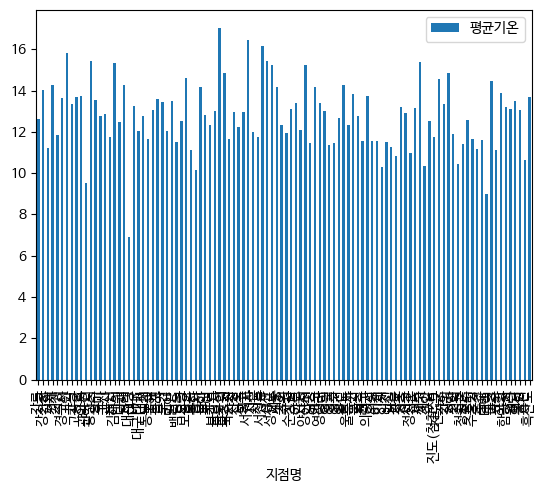

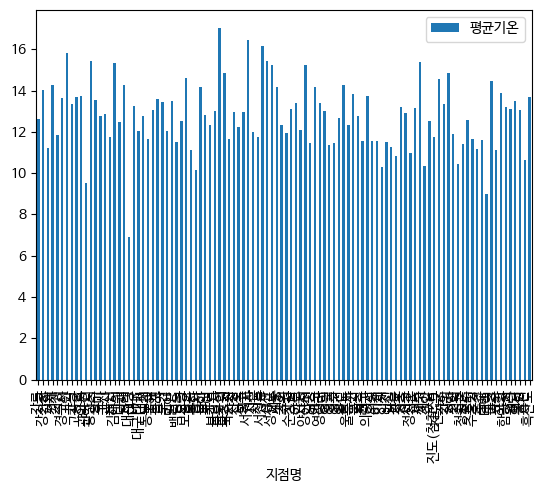

In [59]:
df_temp = df.groupby('지점명').aggregate({'평균기온':'mean'})
df_temp.plot(kind = 'bar')

df.groupby('지점명').aggregate({'평균기온':'mean'}).plot(kind = 'bar')

#### #그룹핑(컬럼 2개): 지점명+년도별,  평균기온

In [64]:
df.groupby(['지점명','년도'])['평균기온'].agg('mean') # 지점명과 년도가 인덱스가 됨
df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균':'mean'})
df.groupby(['지점명','년도']).aggregate({'평균기온':'mean'})
df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균기온':'mean'}).reset_index() # reset_index(): 인덱스가 없어짐

,지점명,년도,평균기온
0,강릉,1911,NaN
1,강릉,1912,11.733333
2,강릉,1913,11.683333
3,강릉,1914,13.175000
4,강릉,1915,12.091667
...,...,...,...
4844,흑산도,2020,14.100000
4845,흑산도,2021,15.258333
4846,흑산도,2022,13.983333
4847,흑산도,2023,14.308333


<Axes: xlabel='지점명,년도'>

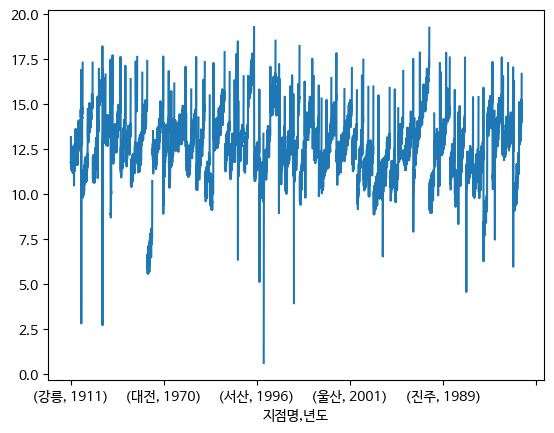

In [65]:
df_temp = df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df_temp.plot()

### [실습문제] : 지점별 최고기온?

In [66]:
#df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
#df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'})

df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'})
df.groupby('지점명').aggregate({'최고기온':'max'})

,최고기온
지점명,
강릉,39.4
강진군,37.4
강화,35.8
거제,38.6
거창,37.8
...,...
합천,39.5
해남,37.2
홍성,37.0


- 인텍스를 초기화 하는 방법

In [67]:
# 인텍스를 초기화 하는 방법
df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
df.groupby('지점명').aggregate({'최고기온':'max'}).reset_index()

,지점명,최고기온
0,강릉,39.4
1,강진군,37.4
2,강화,35.8
3,거제,38.6
4,거창,37.8
...,...,...
99,합천,39.5
100,해남,37.2
101,홍성,37.0
102,홍천,41.0


### [실습문제] : 지점별 년도별 최다 월합강수량?

In [69]:
df.groupby(['지점명','년도'])['월합강수량'].agg(**{'최다월합강수량':'max'})
# df.groupby(['지점명','년도']).aggregate({'월합강수량':'max'})

최다월합강수량
지점명 년도           
강릉  1911     36.5
    1912    346.1
    1913    232.5
    1914    383.4
    1915    302.3
...           ...
흑산도 2020    305.2
    2021    176.0
    2022    131.4
    2023    590.5
    2024    258.3

[4849 rows x 1 columns]

### [실습문제]  제주 전역의 지점별+년도별 최고 최고기온, 최저 최저기온 ,최다 월합강수량, 최다 최심적실은?

In [73]:
df_jeju = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df_jeju = df_jeju.groupby(['지점명','년도']).aggregate({'최고기온':'max',
                                          '최저기온':'min',
                                          '월합강수량':'max',
                                          '최심적설':'max'})

# df_jeju.to_csv('제주-년도별-날씨정보.csv', encoding='cp949') # PC에서 사용할 때 한글 안깨짐(윈도우 os 기준)
df_jeju.to_csv('제주-년도별-날씨정보.csv') # 코랩에서 사용가능한 한글임
df_jeju

최고기온  최저기온  월합강수량  최심적설
지점명 년도                           
고산  1988  30.5  -2.1  207.4   0.5
    1989  30.5  -1.0  273.2   0.3
    1990  32.4  -3.5  205.8   2.7
    1991  31.4  -3.0  368.2   1.0
    1992  31.7   0.2  326.6   NaN
...        ...   ...    ...   ...
제주  2020  36.3  -1.4  400.5   2.1
    2021  34.2  -3.1  493.1   9.2
    2022  37.5  -0.4  265.8   2.7
    2023  37.3  -3.4  273.2  12.2
    2024  35.5  -1.0  271.8   3.7

[294 rows x 4 columns]

#### 6.가공된 파일 신규 저장하기

In [75]:
# 가공된 데이터 신규 파일로 저장하기
# df.to_csv('weather_data2.csv', encoding='cp949', mode='w', index=True) # PC 기준
df.to_csv('weather_data2.csv', mode='w', index=True) # 코랩 환경 한글 사용가능

--------------------------

## 3. 데이터 시각화하기

### [실습] : 지점별 평균기온 그래프

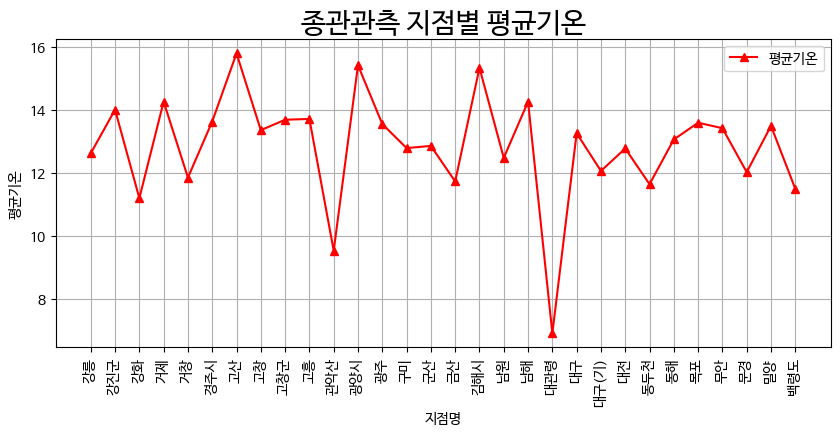

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
df = pd.read_csv(file, encoding='CP949')

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)

# 3.지점별 평균 구하기(지점 30개만 추출)
df_ = df.groupby('지점명').aggregate({'평균기온':'mean'}).head(30)

plt.plot(df_, '^', linestyle='solid', c='red', label='평균기온')
plt.xticks(rotation=90)
plt.title('종관관측 지점별 평균기온', fontsize=20)
plt.xlabel('지점명'); plt.ylabel('평균기온');
plt.legend(); plt.grid();
plt.show()

### [실습문제] : '제주' 지점의 년도별 평균기온을  선 그래프로 나타내기

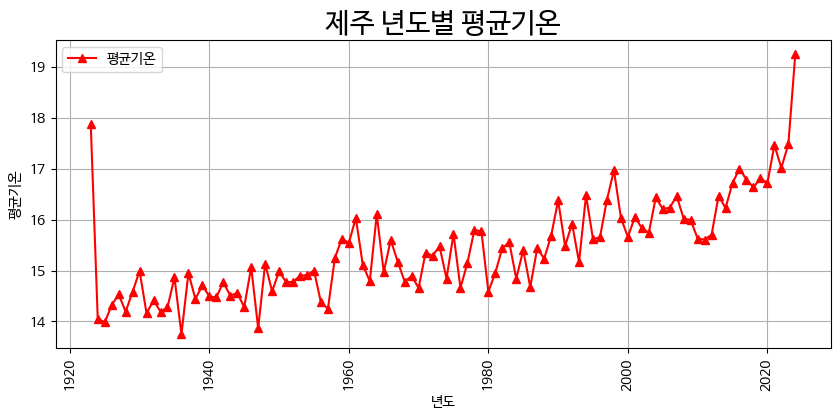

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = 'weather_data2.csv'
df = pd.read_csv(file)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df


# 2,지점별 연도별 그룹핑하기
df2 = df.query(" 지점명 == '제주' ")
# df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명','년도']).aggregate({'평균기온':'mean'}).reset_index()

X = df2.년도
Y = df2.평균기온

# 3.지점별 평균 구하기(지점 30개만 추출)
plt.plot(X, Y, '^', linestyle='solid', c='r', label='평균기온')
plt.title('제주 년도별 평균기온', fontsize=20)
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

### [실습]: 제주의 평균기온, 최고기온, 최저기온 통계를 그래프로 나타내기

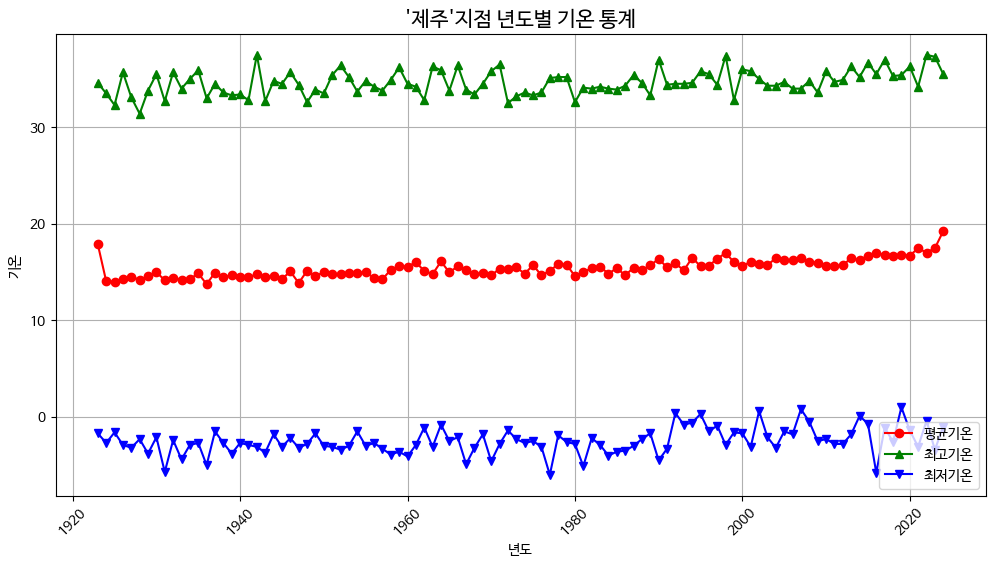

In [79]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도').평균기온.agg(**{'평균기온':'mean'})
data2 = data.groupby('년도').최고기온.agg(**{'최고기온':'max'})
data3 = data.groupby('년도').최저기온.agg(**{'최저기온':'min'})

# 3. 그래프로 시각화하기
plt.plot(data1, 'o', linestyle='solid', c='r', label='평균기온')
plt.plot(data2, '^', linestyle='solid', c='g', label='최고기온')
plt.plot(data3, 'v', linestyle='solid', c='b', label='최저기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')     # x축 레이블
plt.ylabel('기온')     # y축 레이블
plt.legend()           #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기
plt.grid()               # 격자 표시

plt.show()


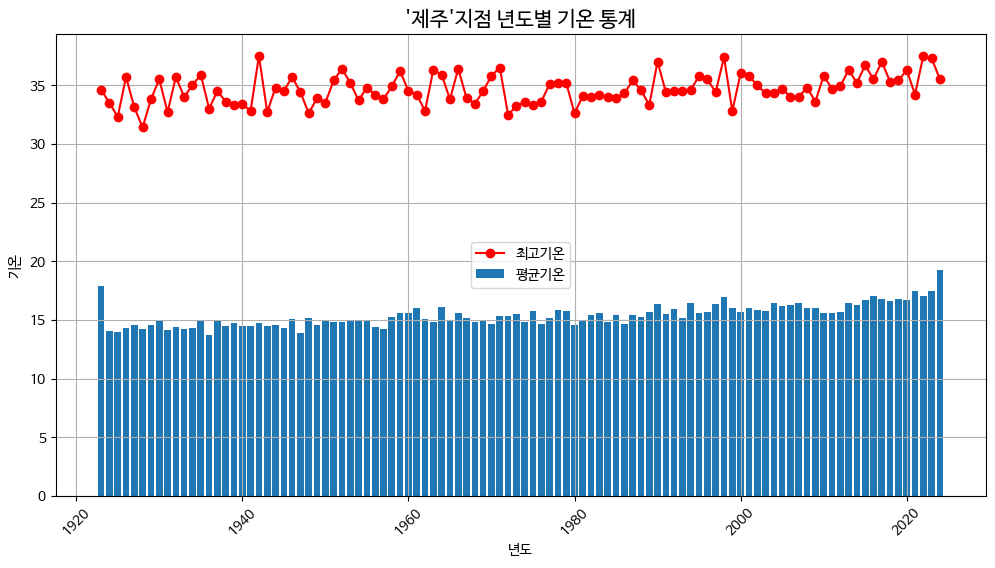

In [80]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'}).reset_index()
data2 = data.groupby('년도')['최고기온'].agg(**{'최고기온':'max'}).reset_index()

# 3. 그래프로 시각화하기
X = data1['년도']
Y1 = data1['평균기온']
Y2 = data2['최고기온']
plt.bar(X, Y1, label='평균기온')
plt.plot(X, Y2, 'o', linestyle='solid', c='r', label='최고기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')        # x축 레이블
plt.ylabel('기온')        # y축 레이블
plt.legend()             #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기

plt.grid()               # 격자 표시

plt.show()

### [실습]: 제주의 최고기온(선그래프),평균기온(막대그래프)을 혼합 그래프로 나타내기

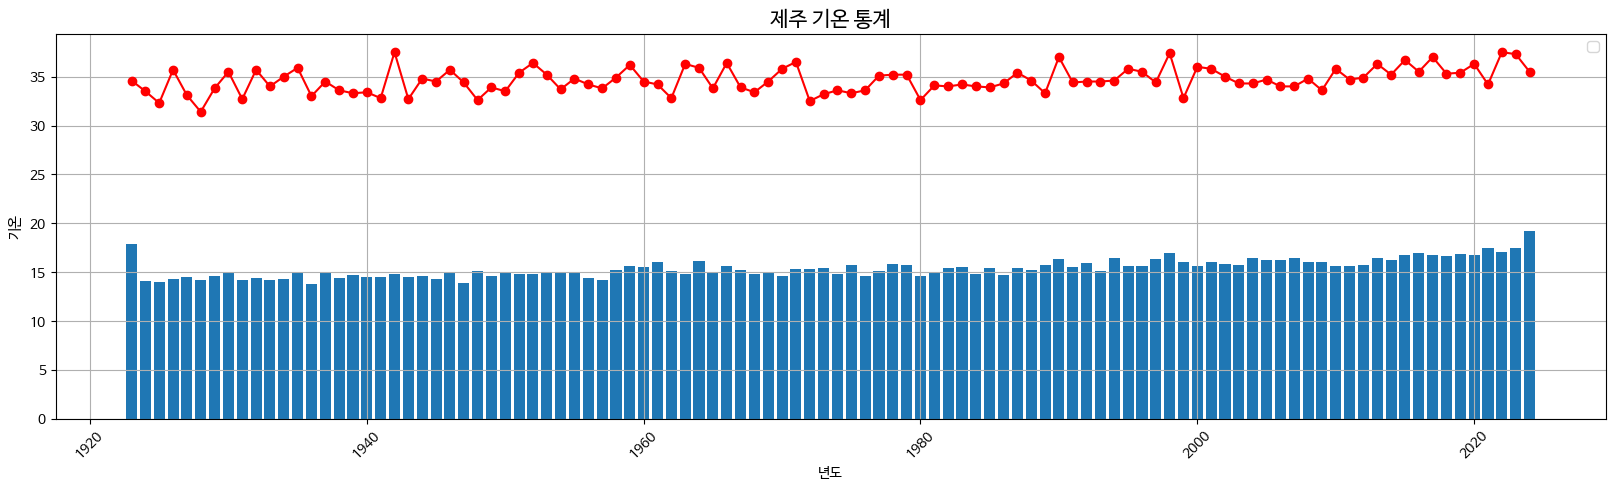

In [81]:
# 3. 그래프로 시각화하기
plt.figure(figsize=(20,5))
plt.title('제주 기온 통계', fontsize=15)         #제목
plt.legend(['최고기온','평균기온']) #범례,기본 위치 : loc='upper left'
plt.xlabel('년도')                 # x축 레이블
plt.ylabel('기온')                 # y축 레이블
plt.xticks(rotation=45)           # x축 레이블 기울이기
plt.grid()                        # 격자 표시

plt.bar(X, Y1)  # 막대 그래프
plt.plot(X, Y2, 'o', linestyle='solid', c='r')  # 선그래프
plt.show()


### [실습] : 2중 축 그래프 그리기 :  평균상대습도 & 월합강수량

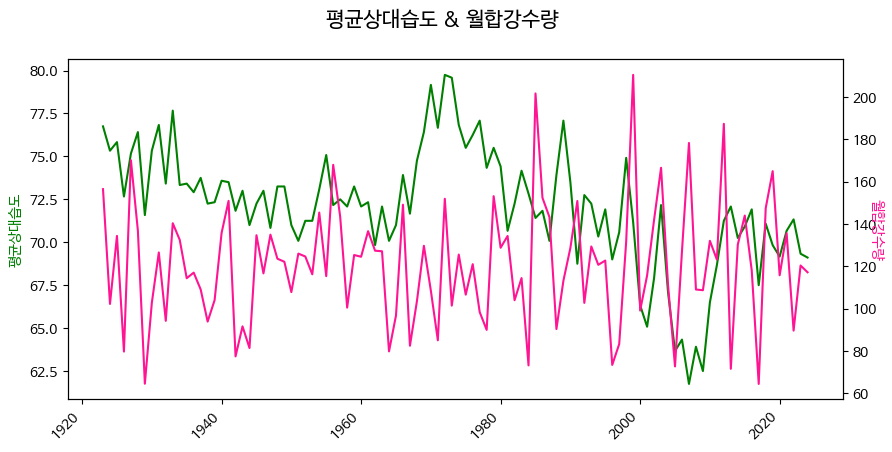

In [82]:
# 2.'제주'지점의 평균상대습도 & 일최다강수량 센터수
data = df.groupby(['지점명','년도'])['평균상대습도'].agg(**{'평균상대습도':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
X  = data['년도']
Y1 = data['평균상대습도']

data = df.groupby(['지점명','년도'])['월합강수량'].agg(**{'월합강수량':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
Y2 = data['월합강수량']
# print(Y2)


# 3. 그래프로 시각화하기
plt.rcParams['figure.figsize'] = (10, 5)   # 그래프 크기

fig, ax1 = plt.subplots()
plt.suptitle('평균상대습도 & 월합강수량',fontsize=15)
ax1.plot(X, Y1, color='green')     # 평균상대습도 (왼쪽)
ax1.set_ylabel('평균상대습도', color = 'green', rotation = 90)
ax2 = ax1.twinx()
ax2.plot(X, Y2, color='deeppink')  # 월합강수량 (오른쪽)
ax2.set_ylabel('월합강수량', color = 'deeppink', rotation = 270)

fig.autofmt_xdate(rotation=45)  #X축 레이블 기울이기

plt.savefig('./graph.png')

plt.show()

-------

---------

끝!